## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

#from nb21 import cumulative_gain, elast


## Cleaning and Encoding Data

In [2]:
#df1 = pd.read_stata('workingpanel(a).dta')  ## test data

In [3]:
##df1['industry'].unique()

In [3]:
df = pd.read_stata('workingpanel.dta')

In [4]:
df

id  period  cons  mediumskill union  Dunion  union02       lhw  \
0        1.0     1.0   1.0          NaN   Yes     1.0      1.0  7.751725   
1        1.0     2.0   1.0          NaN   Yes     1.0      1.0  7.633942   
2        1.0     3.0   1.0          NaN   Yes     1.0      1.0  7.857086   
3        2.0     1.0   1.0          NaN    No     0.0      0.0  7.294967   
4        2.0     2.0   1.0          NaN    No     0.0      0.0  7.880803   
...      ...     ...   ...          ...   ...     ...      ...       ...   
3457  1153.0     2.0   1.0          1.0    No     0.0      0.0  6.547752   
3458  1153.0     3.0   1.0          1.0    No     0.0      0.0  6.742344   
3459  1154.0     1.0   1.0          NaN    No     0.0      0.0  6.547752   
3460  1154.0     2.0   1.0          NaN   Yes     0.0      0.0  6.547752   
3461  1154.0     3.0   1.0          NaN    No     1.0      0.0  6.717652   

         sex healthlim  ...   m_size3   m_size4   m_occu2   m_occu3   m_occu4  \
0       Male        No  ...  0.000000  1.000000  0.666667  0.000000  0.333333   
1       Male        No  ...  0.000000  1.000000  0.666667  0.000000  0.333333   
2       Male        No  ...  0.000000  1.000000  0.666667  0.000000  0.333333   
3       Male        No  ...  0.666667  0.333333  0.333333  0.333333  0.000000   
4       Male        No  ...  0.666667  0.333333  0.333333  0.333333  0.000000   
...      ...       ...  ...       ...       ...       ...       ...       ...   
3457    Male       Yes  ...  1.000000  0.000000  0.000000  0.000000  1.000000   
3458    Male       Yes  ...  1.000000  0.000000  0.000000  0.000000  1.000000   
3459  Female        No  ...  0.333333  0.000000  0.000000  0.000000  0.000000   
3460  Female        No  ...  0.333333  0.000000  0.000000  0.000000  0.000000   
3461  Female        No  ...  0.333333  0.000000  0.000000  0.000000  0.000000   

     m_occu5   m_occu6  m_occu7  m_occu8   m_occu9  
0        0.0  0.000000      0.0      0.0  0.000000  
1        0.0  0.000000      0.0      0.0  0.000000  
2        0.0  0.000000      0.0      0.0  0.000000  
3        0.0  0.000000      0.0      0.0  0.000000  
4        0.0  0.000000      0.0      0.0  0.000000  
...      ...       ...      ...      ...       ...  
3457     0.0  0.000000      0.0      0.0  0.000000  
3458     0.0  0.000000      0.0      0.0  0.000000  
3459     0.0  0.333333      0.0      0.0  0.666667  
3460     0.0  0.333333      0.0      0.0  0.666667  
3461     0.0  0.333333      0.0      0.0  0.666667  

[3462 rows x 87 columns]

In [5]:
df.columns

Index(['id', 'period', 'cons', 'mediumskill', 'union', 'Dunion', 'union02',
       'lhw', 'sex', 'healthlim', 'expr', 'expr2', 'myedu', 'myedu2', 'myedu3',
       'private', 'size', 'size2', 'size3', 'size4', 'occup', 'occup2',
       'occup3', 'occup4', 'occup5', 'occup6', 'occup7', 'occup8', 'occup9',
       'industry', 'industry2', 'industry3', 'industry4', 'industry5',
       'industry6', 'industry7', 'industry8', 'industry9', 'u_sex', 'u_health',
       'u_myedu2', 'u_myedu3', 'u_expr', 'u_expr2', 'u_private', 'u_size2',
       'u_size3', 'u_size4', 'u_indu2', 'u_indu3', 'u_indu4', 'u_indu5',
       'u_indu6', 'u_indu7', 'u_indu8', 'u_indu9', 'u_occu2', 'u_occu3',
       'u_occu4', 'u_occu5', 'u_occu6', 'u_occu7', 'u_occu8', 'u_occu9',
       'm_health', 'm_privat', 'm_expr', 'm_expr2', 'm_indu2', 'm_indu3',
       'm_indu4', 'm_indu5', 'm_indu6', 'm_indu7', 'm_indu8', 'm_indu9',
       'm_size2', 'm_size3', 'm_size4', 'm_occu2', 'm_occu3', 'm_occu4',
       'm_occu5', 'm_occu6', 

In [7]:
#df.union.replace(('Yes', 'No'), (1, 0), inplace=True)

In [8]:
#df.sex.replace(('Male', 'Female'), (1, 0), inplace=True)

In [6]:
df["sex"] = df["sex"].astype('category')
df["sex_cat"] = df["sex"].cat.codes
#df.head()

In [7]:
df.mediumskill.replace((np.nan, 1), (0, 1), inplace=True)

In [8]:
df["mediumskill"] = df["mediumskill"].astype('category')
df["mediumskill_cat"] = df["mediumskill"].cat.codes
#df.head()

In [9]:
df["healthlim"] = df["healthlim"].astype('category')
df["healthlim_cat"] = df["healthlim"].cat.codes
#df.head()

In [10]:
df["private"] = df["private"].astype('category')
df["private_cat"] = df["private"].cat.codes
#df.head()

In [11]:
df["size"] = df["size"].astype('category')
df["size_cat"] = df["size"].cat.codes
#df.head()

In [12]:
df["occup"] = df["occup"].astype('category')
df["occup_cat"] = df["occup"].cat.codes
#df.head()

In [13]:
df["industry"] = df["industry"].astype('category')
df["industry_cat"] = df["industry"].cat.codes
df.head()

id  period  cons mediumskill union  Dunion  union02       lhw   sex  \
0  1.0     1.0   1.0         0.0   Yes     1.0      1.0  7.751725  Male   
1  1.0     2.0   1.0         0.0   Yes     1.0      1.0  7.633942  Male   
2  1.0     3.0   1.0         0.0   Yes     1.0      1.0  7.857086  Male   
3  2.0     1.0   1.0         0.0    No     0.0      0.0  7.294967  Male   
4  2.0     2.0   1.0         0.0    No     0.0      0.0  7.880803  Male   

  healthlim  ...  m_occu7  m_occu8  m_occu9  sex_cat  mediumskill_cat  \
0        No  ...      0.0      0.0      0.0        1                0   
1        No  ...      0.0      0.0      0.0        1                0   
2        No  ...      0.0      0.0      0.0        1                0   
3        No  ...      0.0      0.0      0.0        1                0   
4        No  ...      0.0      0.0      0.0        1                0   

  healthlim_cat private_cat  size_cat  occup_cat  industry_cat  
0             0           1         3          1             0  
1             0           1         3          1             0  
2             0           1         3          3             0  
3             0           1         2          1             6  
4             0           0         2          0             5  

[5 rows x 94 columns]

In [14]:
df.describe()

id       period    cons       Dunion      union02  \
count  3462.000000  3462.000000  3462.0  3462.000000  3462.000000   
mean    577.500000     2.000000     1.0     0.207972     0.162045   
std     333.180206     0.816615     0.0     0.405917     0.368540   
min       1.000000     1.000000     1.0     0.000000     0.000000   
25%     289.000000     1.000000     1.0     0.000000     0.000000   
50%     577.500000     2.000000     1.0     0.000000     0.000000   
75%     866.000000     3.000000     1.0     0.000000     0.000000   
max    1154.000000     3.000000     1.0     1.000000     1.000000   

               lhw         expr        expr2        myedu       myedu2  ...  \
count  3462.000000  3462.000000  3462.000000  3462.000000  3462.000000  ...   
mean      7.082863    26.837088   854.755615     1.944541     0.544194  ...   
std       0.661472    11.600231   706.778503     0.672948     0.498115  ...   
min       4.040373     3.000000     9.000000     1.000000     0.000000  ...   
25%       6.629074    18.000000   324.000000     1.000000     0.000000  ...   
50%       6.940795    26.000000   676.000000     2.000000     1.000000  ...   
75%       7.441570    34.000000  1156.000000     2.000000     1.000000  ...   
max      12.000220    70.000000  4900.000000     3.000000     1.000000  ...   

           m_occu7      m_occu8      m_occu9      sex_cat  mediumskill_cat  \
count  3462.000000  3462.000000  3462.000000  3462.000000      3462.000000   
mean      0.151647     0.145869     0.178221     0.681976         0.550260   
std       0.315598     0.309405     0.308340     0.465776         0.497539   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000     0.000000     0.000000     0.000000         0.000000   
50%       0.000000     0.000000     0.000000     1.000000         1.000000   
75%       0.000000     0.000000     0.333333     1.000000         1.000000   
max       1.000000     1.000000     1.000000     1.000000         1.000000   

       healthlim_cat  private_cat     size_cat    occup_cat  industry_cat  
count    3462.000000  3462.000000  3462.000000  3462.000000   3462.000000  
mean        0.025708     0.808203     1.714905     4.867707      4.794627  
std         0.158285     0.393771     1.097607     2.373370      2.804472  
min         0.000000     0.000000     0.000000     0.000000      0.000000  
25%         0.000000     1.000000     1.000000     3.000000      2.000000  
50%         0.000000     1.000000     2.000000     5.000000      5.000000  
75%         0.000000     1.000000     3.000000     7.000000      8.000000  
max         1.000000     1.000000     3.000000     8.000000      8.000000  

[8 rows x 86 columns]

In [15]:
df = df[['cons','Dunion','lhw','expr','myedu','mediumskill_cat','healthlim_cat','sex_cat','private_cat','size_cat','occup_cat','industry_cat']]

In [16]:
df.describe()

cons       Dunion          lhw         expr        myedu  \
count  3462.0  3462.000000  3462.000000  3462.000000  3462.000000   
mean      1.0     0.207972     7.082863    26.837088     1.944541   
std       0.0     0.405917     0.661472    11.600231     0.672948   
min       1.0     0.000000     4.040373     3.000000     1.000000   
25%       1.0     0.000000     6.629074    18.000000     1.000000   
50%       1.0     0.000000     6.940795    26.000000     2.000000   
75%       1.0     0.000000     7.441570    34.000000     2.000000   
max       1.0     1.000000    12.000220    70.000000     3.000000   

       mediumskill_cat  healthlim_cat      sex_cat  private_cat     size_cat  \
count      3462.000000    3462.000000  3462.000000  3462.000000  3462.000000   
mean          0.550260       0.025708     0.681976     0.808203     1.714905   
std           0.497539       0.158285     0.465776     0.393771     1.097607   
min           0.000000       0.000000     0.000000     0.000000     0.000000   
25%           0.000000       0.000000     0.000000     1.000000     1.000000   
50%           1.000000       0.000000     1.000000     1.000000     2.000000   
75%           1.000000       0.000000     1.000000     1.000000     3.000000   
max           1.000000       1.000000     1.000000     1.000000     3.000000   

         occup_cat  industry_cat  
count  3462.000000   3462.000000  
mean      4.867707      4.794627  
std       2.373370      2.804472  
min       0.000000      0.000000  
25%       3.000000      2.000000  
50%       5.000000      5.000000  
75%       7.000000      8.000000  
max       8.000000      8.000000


## Covariates Balance

In [20]:
from sklearn.manifold import TSNE
import plotly.express as px

features = df[['expr','myedu','mediumskill_cat','healthlim_cat','sex_cat','private_cat','size_cat','occup_cat','industry_cat']]

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.Dunion.replace((0, 1), ("Control", "Treated"), inplace=False), template = "simple_white",labels={'color': 'Dunion'},color_discrete_map={'Treated':'#FFA500','Control':'#1E90FF'}
        )

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_xaxes(visible=False, showticklabels=False)
fig.show()



C:\Users\leona\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\leona\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


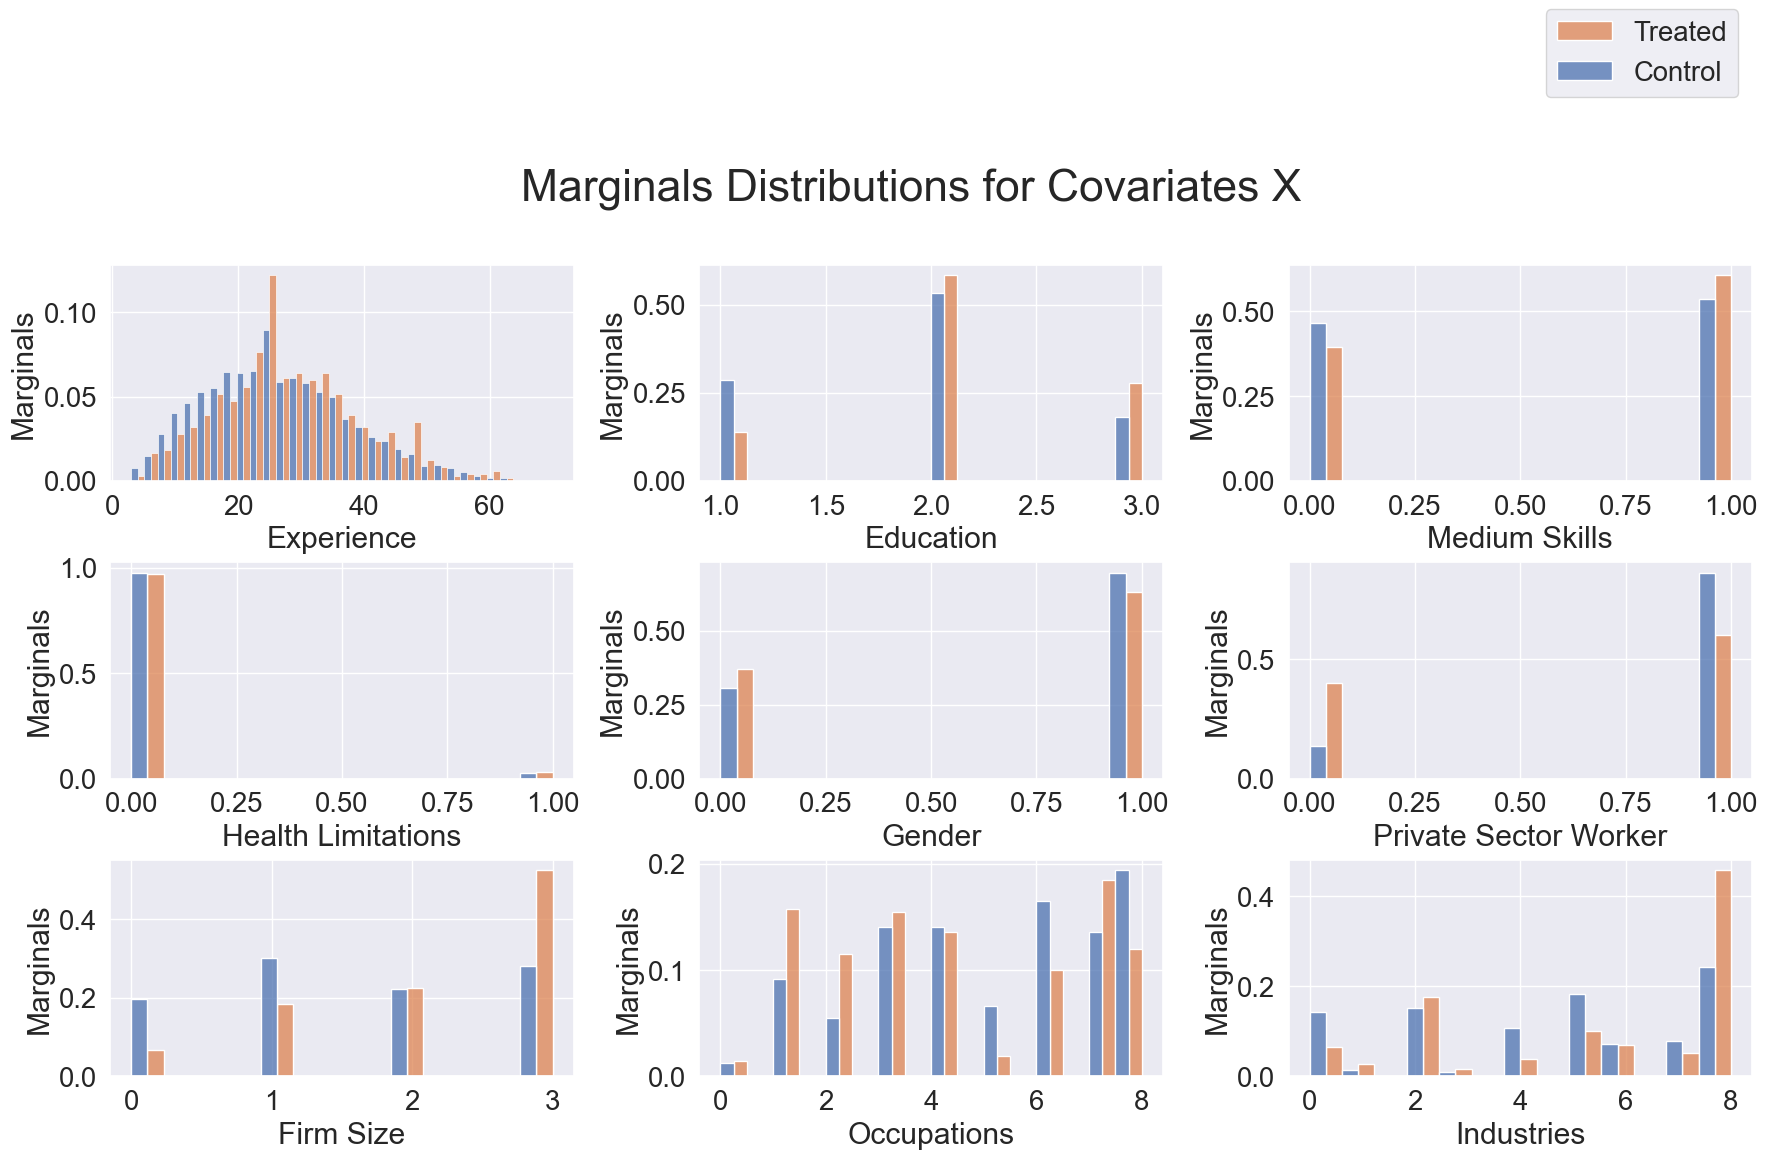

In [42]:
## Balance

fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Marginals Distributions for Covariates X',fontsize = 32)
sns.set(font_scale=1.8)
plt.tight_layout()
sns.histplot(df, x='expr', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False, ax=axs[0,0]).set(xlabel='Experience', ylabel='Marginals') 
sns.histplot(df, x='myedu', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False, ax=axs[0,1]).set(xlabel='Education', ylabel='Marginals')
sns.histplot(df, x='mediumskill_cat', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False, ax=axs[0,2]).set(xlabel='Medium Skills', ylabel='Marginals') 
sns.histplot(df, x='healthlim_cat', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False,ax=axs[1,0]).set(xlabel='Health Limitations', ylabel='Marginals')
sns.histplot(df, x='sex_cat', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False,ax=axs[1,1]).set(xlabel='Gender', ylabel='Marginals')
sns.histplot(df, x='private_cat', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False, ax=axs[1,2]).set(xlabel='Private Sector Worker', ylabel='Marginals')
sns.histplot(df, x='size_cat', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False,ax=axs[2,0]).set(xlabel='Firm Size', ylabel='Marginals')
sns.histplot(df, x='occup_cat', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False,ax=axs[2,1]).set(xlabel='Occupations', ylabel='Marginals')
sns.histplot(df, x='industry_cat', hue="Dunion", stat="proportion",multiple='dodge',common_norm=False, legend =False,ax=axs[2,2]).set(xlabel='Industries', ylabel='Marginals')

plt.legend(labels=["Treated","Control"], bbox_to_anchor=(1,5))
plt.savefig('covariatemargins_v2.pdf')


## Split test and train data

In [43]:
y = "lhw"
T = "Dunion"
X = ['expr','myedu','mediumskill_cat','healthlim_cat','sex_cat','private_cat','size_cat','occup_cat','industry_cat'] ##covars that I consider for CATE 

In [44]:
X

['expr',
 'myedu',
 'mediumskill_cat',
 'healthlim_cat',
 'sex_cat',
 'private_cat',
 'size_cat',
 'occup_cat',
 'industry_cat']

In [45]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

(2423, 12) (1039, 12)


## S-Learner 

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from econml.sklearn_extensions.model_selection import GridSearchCVList
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from econml.sklearn_extensions.linear_model import WeightedLasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

np.random.seed(123)
s_learner = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123) ##Gridsearch model
s_learner.fit(train[X+[T]], train[y])

RandomForestRegressor(min_samples_leaf=10, random_state=123)

In [47]:
##Treatment Effect
treatment_effect1 = train.query('Dunion==1')['lhw'].mean(axis = 0)
treatment_effect0 = train.query('Dunion==0')['lhw'].mean(axis = 0)

naive_te = treatment_effect1 - treatment_effect0 ##naive estimator


In [48]:
naive_te

0.2437119483947754

In [49]:
s_learner_cate_train = (s_learner.predict(train[X].assign(**{T: 1})) -
                        s_learner.predict(train[X].assign(**{T: 0})))

s_learner_cate_test = test.assign(
    cate=(s_learner.predict(test[X].assign(**{T: 1})) - # predict under treatment
          s_learner.predict(test[X].assign(**{T: 0}))) # predict under control
)

In [50]:
s_learner_cate_test[['cate']] ##CATE

cate
773  -0.008589
2076  0.239627
25    0.104298
2915  0.100169
1833  0.038869
...        ...
1233  0.003963
850   0.017825
1942  0.042404
2190 -0.020512
1999  0.050588

[1039 rows x 1 columns]

In [51]:
baseline = s_learner_cate_test[['cate']].mean(axis = 0) #ATE

In [52]:
baseline[0] ## este es el mejor modelo!

0.03605864664049776

In [53]:
s_learner.score(test[X+[T]],test[y])  #R2

0.48145931159172106

In [54]:
mse = mean_squared_error(test[y],s_learner.predict(test[X+[T]])) #we can set any metric av in sklearn

In [55]:
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.2342


In [56]:
rsqua = r2_score(test[y],s_learner.predict(test[X+[T]]))

In [57]:
rsqua ## R2 just checking... 

0.48145931159172106

In [58]:
slearner_cate = s_learner_cate_test[['cate']].values

In [59]:
import scipy.stats as st ### INTERVALO DE CONFIANZA ATE hay q ver para los de econML
st.norm.interval(confidence=0.99, 
                 loc=np.mean(slearner_cate),
                 scale=st.sem(slearner_cate))

(array([0.03026995]), array([0.04184734]))

## X-Learner

In [60]:
from sklearn.linear_model import LogisticRegression

np.random.seed(123)

# first stage models (this can be changed!) 
m0 = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123)
m1 = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123)

# propensity score model
g = RandomForestClassifier(n_estimators=100, max_depth=6) 

m0.fit(train.query(f"{T}==0")[X], train.query(f"{T}==0")[y])
m1.fit(train.query(f"{T}==1")[X], train.query(f"{T}==1")[y])
                       
g.fit(train[X], train[T]);

In [61]:
d_train = np.where(train[T]==0,
                   m1.predict(train[X]) - train[y],
                   train[y] - m0.predict(train[X]))

# second stage
mx0 = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123)
mx1 = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123)

mx0.fit(train.query(f"{T}==0")[X], d_train[train[T]==0])
mx1.fit(train.query(f"{T}==1")[X], d_train[train[T]==1]);

In [62]:
def ps_predict(df, t): 
    return g.predict_proba(df[X])[:, t]
    
    
x_cate_train = (ps_predict(train,0)*mx0.predict(train[X]) +
                ps_predict(train,1)*mx1.predict(train[X]))

x_cate_test = test.assign(cate=(ps_predict(test,0)*mx0.predict(test[X]) +
                                ps_predict(test,1)*mx1.predict(test[X])))

In [63]:
x_cate_test[['cate']] ##CATE

cate
773   0.023340
2076  0.422191
25    0.415897
2915  0.151681
1833  0.079789
...        ...
1233  0.001574
850   0.113897
1942  0.229558
2190  0.033097
1999  0.110963

[1039 rows x 1 columns]

In [64]:
#baseline2 = x_cate_test[['cate']].mean(axis = 0) #ATE

In [65]:
#baseline2

In [66]:
m0.score(test[X],test[y])  #r2

0.47345048795830647

## T-Learner

In [67]:
np.random.seed(123)

m0 = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123)
m1 = RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123)

m0.fit(train.query(f"{T}==0")[X], train.query(f"{T}==0")[y])
m1.fit(train.query(f"{T}==1")[X], train.query(f"{T}==1")[y])

# estimate the CATE
t_learner_cate_train = m1.predict(train[X]) - m0.predict(train[X])
t_learner_cate_test = test.assign(cate=m1.predict(test[X]) - m0.predict(test[X]))

In [68]:
t_learner_cate_test[['cate']] ##CATE

cate
773   0.068485
2076  0.518753
25    0.454541
2915  0.151798
1833  0.107472
...        ...
1233 -0.083123
850   0.113263
1942  0.162003
2190 -0.140359
1999  0.100574

[1039 rows x 1 columns]

In [69]:
#baseline3 = t_learner_cate_test[['cate']].mean(axis = 0) #ATE

In [70]:
#baseline3

In [71]:
m0.score(test[X],test[y])  #r2

0.47345048795830647

### EconML library

In [72]:
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

In [73]:
df.head()

cons  Dunion       lhw  expr  myedu  mediumskill_cat  healthlim_cat  \
0   1.0     1.0  7.751725  26.0    3.0                0              0   
1   1.0     1.0  7.633942  28.0    3.0                0              0   
2   1.0     1.0  7.857086  30.0    3.0                0              0   
3   1.0     0.0  7.294967  10.0    3.0                0              0   
4   1.0     0.0  7.880803  12.0    3.0                0              0   

   sex_cat  private_cat  size_cat  occup_cat  industry_cat  
0        1            1         3          1             0  
1        1            1         3          1             0  
2        1            1         3          3             0  
3        1            1         2          1             6  
4        1            0         2          0             5

In [74]:
np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

(2423, 12) (1039, 12)


In [75]:
Y = train["lhw"].values
T = train["Dunion"].values
X = train[['expr','myedu','mediumskill_cat','healthlim_cat','sex_cat','private_cat','size_cat','occup_cat','industry_cat']].values ## ADD MORE VARS
X_test = test[['expr','myedu','mediumskill_cat','healthlim_cat','sex_cat','private_cat','size_cat','occup_cat','industry_cat']].values
Y_test = test["lhw"].values
T_test = test["Dunion"].values

In [76]:
from econml.sklearn_extensions.model_selection import GridSearchCVList
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from econml.sklearn_extensions.linear_model import WeightedLasso

##CHOOSING THE BEST HYPERPARAMETERS FOR FIRST STAGE MODELS!

def first_stage_reg():  ##grid search example
    return GridSearchCVList([Lasso(),
                             RandomForestRegressor(n_estimators=100, random_state=123),
                             GradientBoostingRegressor()
                            ],
                             param_grid_list=[{'alpha': [.001, .01, .1, 1, 10]},
                                               {'max_depth': [3, None],
                                               'min_samples_leaf': [10, 50]},
                                              {"max_depth": [3, 5, None], "n_estimators": [50, 100, 200]}
                                             ],
                             cv=5,
                             scoring='r2')

In [77]:
model_y = clone(first_stage_reg().fit(X, Y).best_estimator_)
model_y

RandomForestRegressor(min_samples_leaf=10, random_state=123)

In [78]:
# Instantiate S learner
overall_model = model_y
S_learner = SLearner(overall_model=overall_model)
# Train S_learner
S_learner.fit(Y, T, X=X)
# Estimate treatment effects on test data
S_te = S_learner.effect(X_test) #CATE

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [79]:
ateS = np.mean(S_te)

In [80]:
ateS ##checking values... OK!

In [81]:
S_te #treatment effects

array([-0.00858897,  0.23962675,  0.10429765, ...,  0.04240377,
       -0.0205124 ,  0.050588  ])

In [82]:
S_lear = S_learner.fit(Y, T, X=X)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [83]:
import scipy.stats as st ### INTERVALO DE CONFIANZA 
st.norm.interval(confidence=0.99, 
                 loc=np.mean(S_te),
                 scale=st.sem(S_te))

In [84]:
import shap ##SHAP interpreter; mutted because took so long
slear = S_learner.fit(Y, T, X=X)
shap_values = slear.shap_values(X[:])




Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
Exact explainer:   2%|▏         | 58/2423 [00:19<24:03,  1.64it/s]


KeyboardInterrupt: 

In [64]:
shap_values

defaultdict(dict,
            {'Y0': {'T0_1.0': .values =
  array([[ 0.00092988, -0.03951055, -0.0301811 , ...,  0.02361934,
          -0.06374374,  0.01550695],
         [-0.00095344,  0.00877538,  0.02451613, ...,  0.00268512,
           0.02053315,  0.01145736],
         [-0.02873026,  0.01501807,  0.00673486, ...,  0.00834612,
           0.05416102,  0.02584347],
         ...,
         [-0.00448196,  0.02747401, -0.03875205, ..., -0.01560935,
           0.00476075, -0.01406733],
         [-0.01148348,  0.04638976,  0.02230934, ..., -0.00681042,
           0.01150839, -0.01020519],
         [ 0.02668597,  0.00692473,  0.02799795, ...,  0.00094827,
           0.01621583, -0.01030963]])
  
  .base_values =
  array([0.04015697, 0.04015697, 0.04015697, ..., 0.04015697, 0.04015697,
         0.04015697])
  
  .data =
  array([[31.,  3.,  0., ...,  1.,  1.,  8.],
         [19.,  2.,  1., ...,  2.,  4.,  8.],
         [51.,  2.,  1., ...,  3.,  3.,  8.],
         ...,
         [34.,  1.,  0

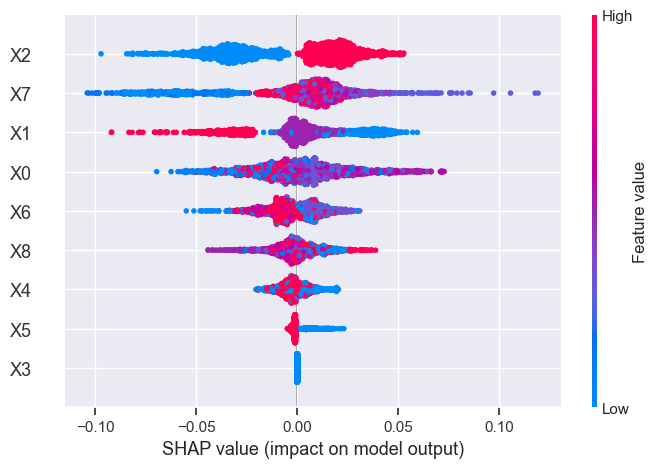

In [65]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values['Y0']['T0_1.0'],show=False)
plt.savefig("shap_summary_v2.pdf",dpi=700) #.png,.pdf will also support here


In [85]:
# Instantiate X learner
models = model_y
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner.fit(Y, T, X=X)
# Estimate treatment effects on test data
X_te = X_learner.effect(X_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [86]:
X_te
ateX = np.mean(X_te)
ateX

In [68]:
st.norm.interval(confidence=0.99, 
                 loc=np.mean(X_te),
                 scale=st.sem(X_te))

In [87]:
# Instantiate T learner
models = model_y
T_learner = TLearner(models=models)
# Train T_learner
T_learner.fit(Y, T, X=X)
# Estimate treatment effects on test data
T_te = T_learner.effect(X_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [88]:
T_te

array([ 0.06848481,  0.51875264,  0.45454058, ...,  0.16200279,
       -0.1403587 ,  0.10057403])

In [89]:
ateT = np.mean(T_te)

In [90]:
ateT

In [91]:
st.norm.interval(confidence=0.99, 
                 loc=np.mean(T_te),
                 scale=st.sem(T_te))

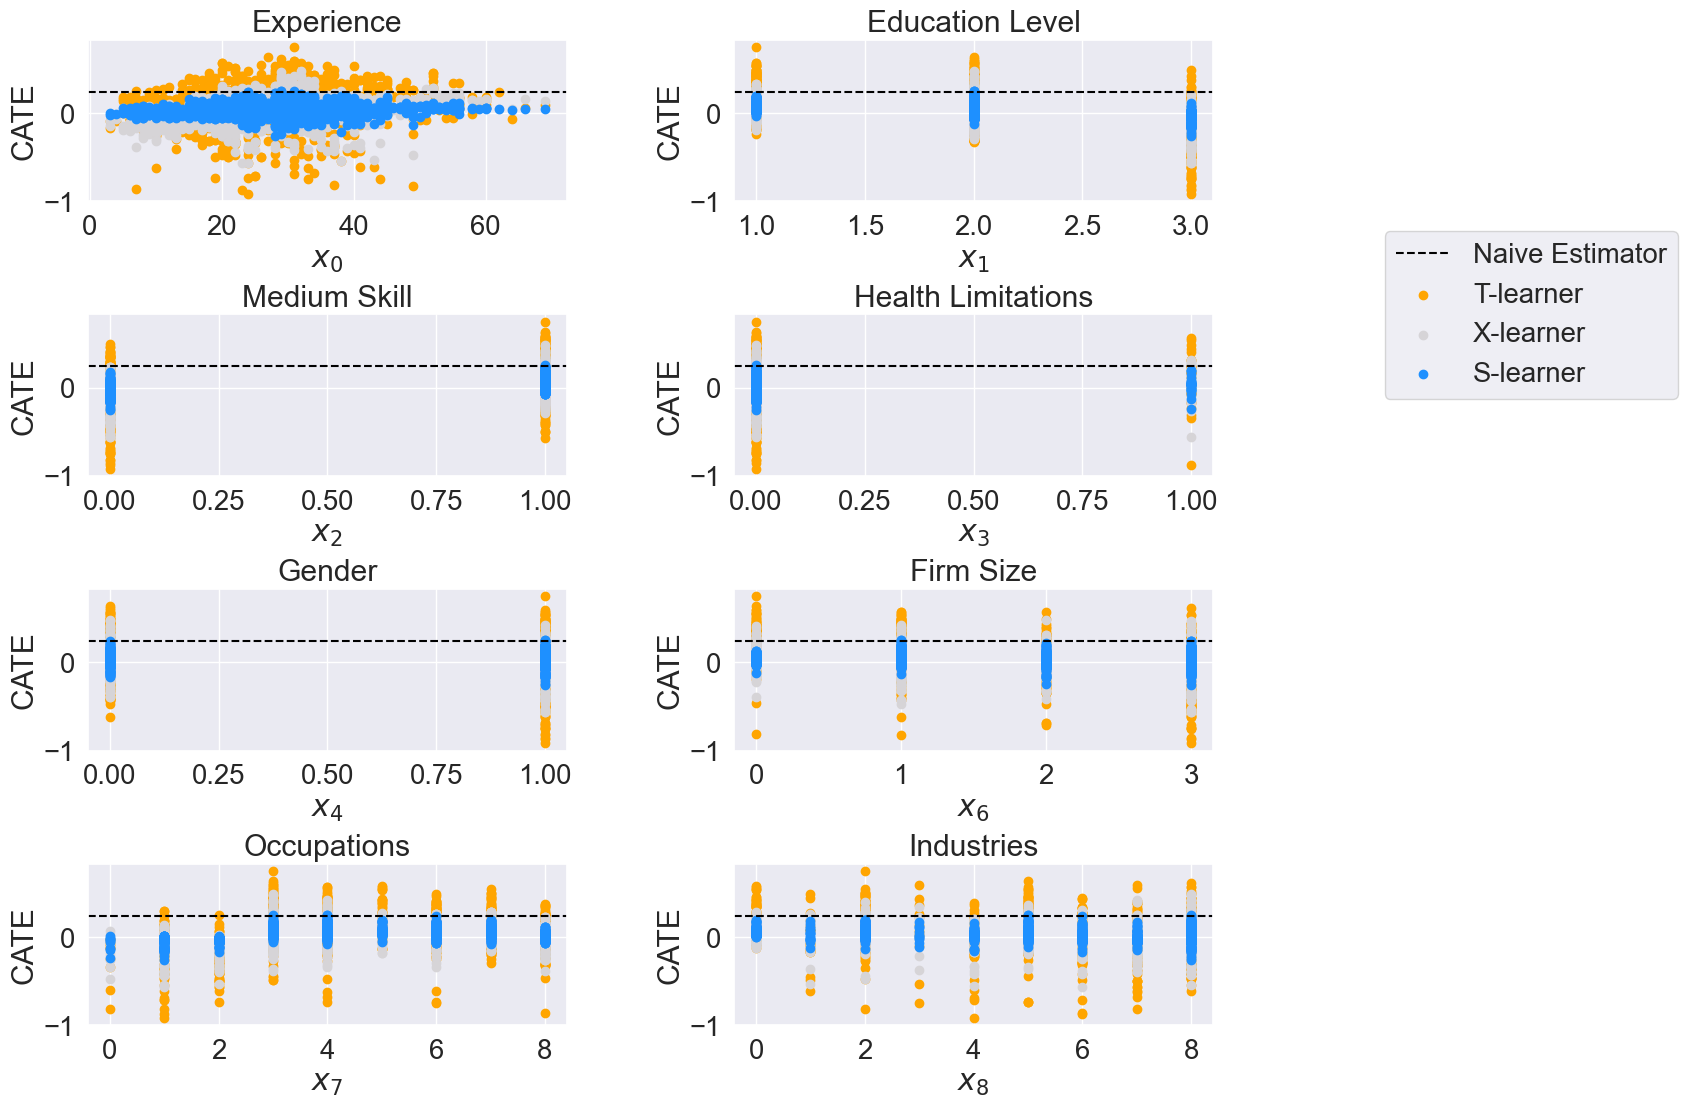

In [145]:
from matplotlib.ticker import NullFormatter, FixedLocator
plt.figure(figsize=(15,15))

#1
plt.subplot2grid((5,2), (0,0))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,0],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,0],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,0],S_te, label='S-learner',color='#1E90FF')
plt.xlabel('$x_0$')
plt.ylabel('CATE')
#plt.legend() ##check this here and in the cates one
plt.title('Experience')

#2
plt.subplot2grid((5,2), (0,1))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,1],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,1],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,1],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_1$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Education Level')

#3
plt.subplot2grid((5,2), (1,0))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,2],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,2],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,2],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_2$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Medium Skill')

#4
plt.subplot2grid((5,2), (1,1))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,3],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,3],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,3],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_3$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Health Limitations')

#5
plt.subplot2grid((5,2), (2,0))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,4],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,4],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,4],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_4$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Gender')


#6
plt.subplot2grid((5,2), (2,1))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,6],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,6],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,6],S_te, label='S-learner',color='#1E90FF')
plt.xlabel('$x_6$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Firm Size')


#7
plt.subplot2grid((5,2), (3,0))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,7],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,7],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,7],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_7$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Occupations')

#8
plt.subplot2grid((5,2), (3,1))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,8],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,8],X_te, label='X-learner',color='#D6D4D7')
plt.scatter(X_test[:,8],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_8$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Industries')



plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.20, right=0.95, hspace=0.7,
                    wspace=0.35)
plt.legend(bbox_to_anchor=(2,5), loc="upper right")
plt.savefig('CATEvsCovs_vert_v2.pdf')
plt.show()






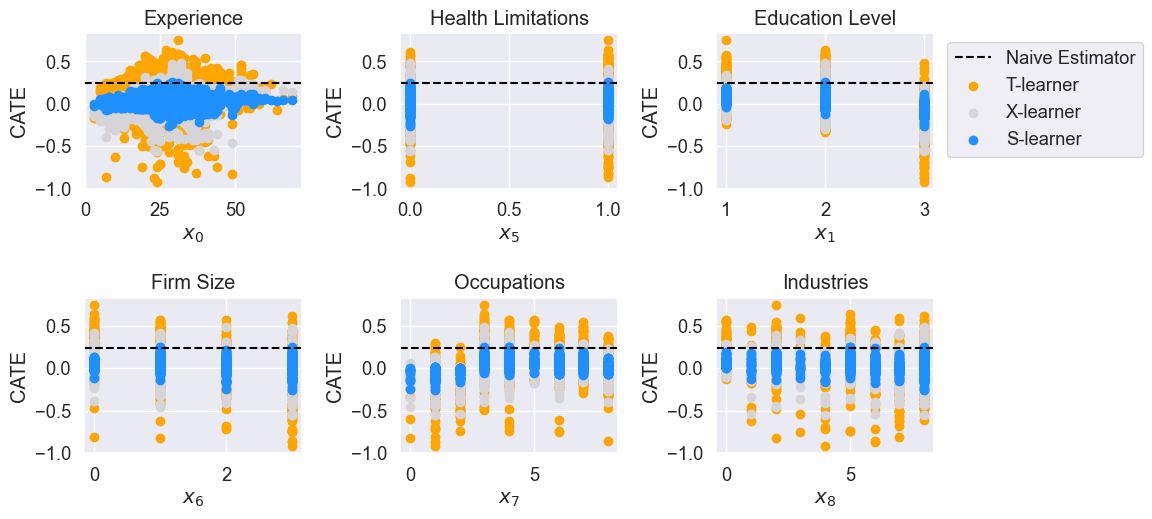

In [104]:
## same chart than above but for the presentation
from matplotlib.ticker import NullFormatter, FixedLocator
plt.figure(figsize=(10, 5))

#1
plt.subplot2grid((2,3), (0,0))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,0],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,0],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,0],S_te, label='S-learner',color='#1E90FF')
plt.xlabel('$x_0$')
plt.ylabel('CATE')
#plt.legend() ##check this here and in the cates one
plt.title('Experience')


#3
plt.subplot2grid((2,3), (0,2))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,1],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,1],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,1],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_1$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Education Level')

#5
plt.subplot2grid((2,3), (0,1))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,5],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,5],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,5],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_5$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Health Limitations')


#6
plt.subplot2grid((2,3), (1,0))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,6],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,6],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,6],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_6$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Firm Size')


#7
plt.subplot2grid((2,3), (1,1))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,7],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,7],X_te, label='X-learner',color='#D6D4D7') 
plt.scatter(X_test[:,7],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_7$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Occupations')

#8
plt.subplot2grid((2,3), (1,2))
plt.axhline(naive_te, color = 'black', linestyle = '--', label = 'Naive Estimator')
plt.scatter(X_test[:,8],T_te, label='T-learner',color='#FFA500') 
plt.scatter(X_test[:,8],X_te, label='X-learner',color='#D6D4D7')
plt.scatter(X_test[:,8],S_te, label='S-learner',color='#1E90FF') 
plt.xlabel('$x_8$')
plt.ylabel('CATE')
#plt.legend()
plt.title('Industries')



plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.7,
                    wspace=0.45)
plt.legend(bbox_to_anchor=(2,2.7), loc="upper right")
plt.savefig('CATEvsCovs_hor_v2.pdf')
plt.show()

## CAUSAL FOREST (TO SELECT FEATURE IMPORTANCE) 

In [107]:
from econml.grf import CausalForest, CausalIVForest, RegressionForest
from econml.dml import CausalForestDML
import scipy.special
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [108]:
df

cons  Dunion       lhw  expr  myedu  mediumskill_cat  healthlim_cat  \
0      1.0     1.0  7.751725  26.0    3.0                0              0   
1      1.0     1.0  7.633942  28.0    3.0                0              0   
2      1.0     1.0  7.857086  30.0    3.0                0              0   
3      1.0     0.0  7.294967  10.0    3.0                0              0   
4      1.0     0.0  7.880803  12.0    3.0                0              0   
...    ...     ...       ...   ...    ...              ...            ...   
3457   1.0     0.0  6.547752  23.0    3.0                1              1   
3458   1.0     0.0  6.742344  25.0    3.0                1              1   
3459   1.0     0.0  6.547752  49.0    1.0                0              0   
3460   1.0     0.0  6.547752  49.0    1.0                0              0   
3461   1.0     1.0  6.717652  53.0    1.0                0              0   

      sex_cat  private_cat  size_cat  occup_cat  industry_cat  
0           1            1         3          1             0  
1           1            1         3          1             0  
2           1            1         3          3             0  
3           1            1         2          1             6  
4           1            0         2          0             5  
...       ...          ...       ...        ...           ...  
3457        1            0         2          3             8  
3458        1            0         2          3             8  
3459        0            1         1          8             2  
3460        0            1         1          5             5  
3461        0            1         2          8             0  

[3462 rows x 12 columns]

In [109]:
np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

Y = train["lhw"].values
T = train["Dunion"].values
X = train[['expr','myedu','mediumskill_cat','healthlim_cat','sex_cat','private_cat','size_cat','occup_cat','industry_cat']].values
X_test = test[['expr','myedu','mediumskill_cat','healthlim_cat','sex_cat','private_cat','size_cat','occup_cat','industry_cat']].values
Y_test = test["lhw"].values
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], 1 - 1))*np.arange(1, 1).reshape(1, -1)])


(2423, 12) (1039, 12)


In [110]:
est = CausalForest(criterion='het', n_estimators=400, min_samples_leaf=5, max_depth=None,
                   min_var_fraction_leaf=None, min_var_leaf_on_val=True,
                   min_impurity_decrease = 0.0, max_samples=0.45, min_balancedness_tol=.45,
                   warm_start=False, inference=True, fit_intercept=True, subforest_size=4,
                   honest=True, verbose=0, n_jobs=-1, random_state=1235)

In [111]:
est.fit(X,T, Y)

CausalForest(criterion='het', min_var_leaf_on_val=True, n_estimators=400,
             random_state=1235)

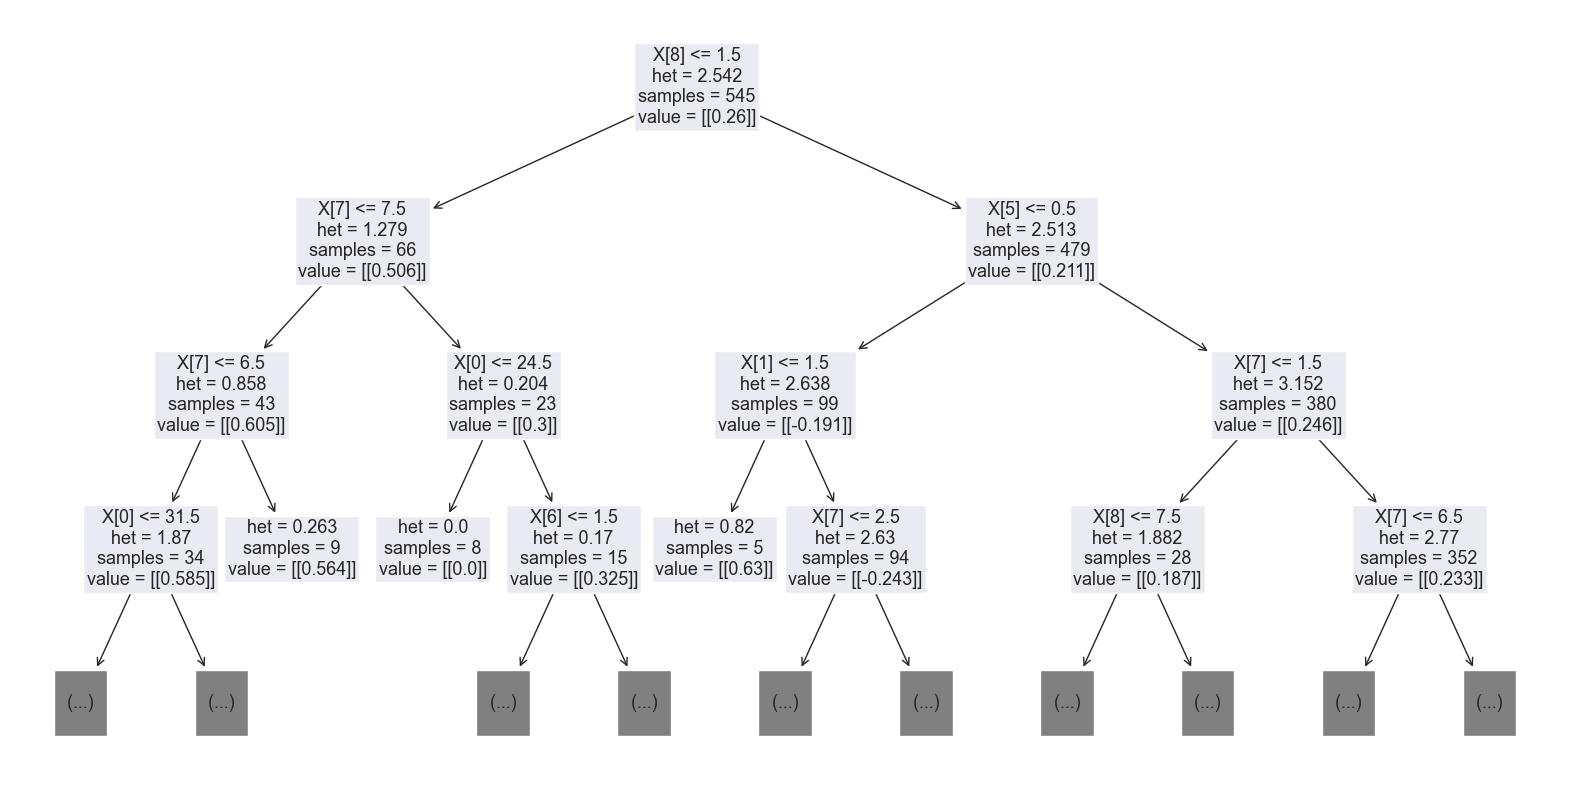

In [112]:
plt.figure(figsize=(20, 10))
plot_tree(est[0], impurity=True, max_depth=3)
plt.savefig('CF_tree_v2.pdf')
plt.show()

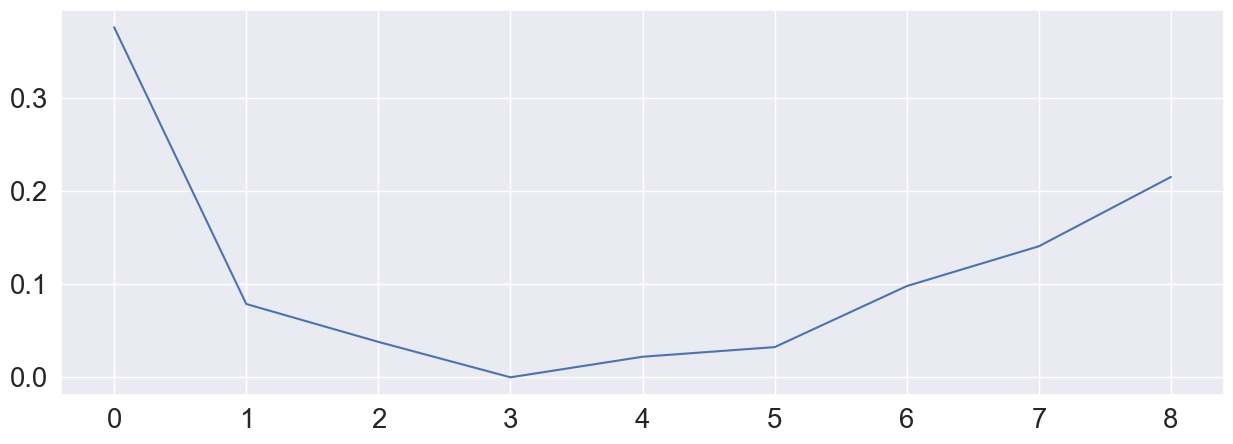

In [113]:
plt.figure(figsize=(15,5))
plt.plot(est.feature_importances(max_depth=4, depth_decay_exponent=2.0))
plt.savefig('feature_importance_v2.pdf')
plt.show()

In [ ]:
## individual models

In [114]:
np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

Y = train["lhw"].values
T = train["Dunion"].values
X8 = train[["industry_cat"]].values
X8_test = test[["industry_cat"]].values
Y_test = test["lhw"].values
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], 1 - 1))*np.arange(1, 1).reshape(1, -1)])

(2423, 12) (1039, 12)


In [115]:
# Instantiate S learner
overall_model = model_y
S_learner = SLearner(overall_model=overall_model)
# Train S_learner
S_learner.fit(Y, T, X=X8)
# Estimate treatment effects on test data
S_te_8 = S_learner.effect(X8_test) #CATE

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [116]:
ateS = np.mean(S_te_8)
ateS

In [117]:
#chart
#plt.figure(figsize=(8, 5))
#plt.axhline(baseline[0], color = 'r', linestyle = '-', label = 'ATE')
#plt.scatter(X9_test[:,0],S_te_9, label='S-learner',color='#1E90FF') ##CHECK THIS
#plt.xlabel('$x_0$')
#plt.ylabel('CATE')
#plt.legend()
#plt.show()

In [118]:

np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

Y = train["lhw"].values
T = train["Dunion"].values
X0 = train[["expr"]].values
X0_test = test[["expr"]].values
Y_test = test["lhw"].values
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], 1 - 1))*np.arange(1, 1).reshape(1, -1)])



(2423, 12) (1039, 12)


In [119]:
# Instantiate S learner
overall_model = model_y
S_learner = SLearner(overall_model=overall_model)
# Train S_learner
S_learner.fit(Y, T, X=X0)
# Estimate treatment effects on test data
S_te_0 = S_learner.effect(X0_test) #CATE

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [120]:
ateS = np.mean(S_te_0)
ateS

In [121]:
##plt.figure(figsize=(8, 5))
##plt.axhline(baseline[0], color = 'r', linestyle = '-', label = 'ATE')
##plt.scatter(X0_test[:,0],S_te_0, label='S-learner',color='#1E90FF') ##CHECK THIS
##plt.xlabel('$x_0$')
##plt.ylabel('CATE')
##plt.legend()
##plt.show()

In [122]:

np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

Y = train["lhw"].values
T = train["Dunion"].values
X5 = train[["healthlim_cat"]].values
X5_test = test[["healthlim_cat"]].values
Y_test = test["lhw"].values
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], 1 - 1))*np.arange(1, 1).reshape(1, -1)])


(2423, 12) (1039, 12)


In [123]:
# Instantiate S learner
overall_model = model_y
S_learner = SLearner(overall_model=overall_model)
# Train S_learner
S_learner.fit(Y, T, X=X5)
# Estimate treatment effects on test data
S_te_5 = S_learner.effect(X5_test) #CATE

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [124]:
ateS = np.mean(S_te_5)
ateS

In [125]:
##plt.figure(figsize=(8, 5))
##plt.axhline(baseline[0], color = 'r', linestyle = '-', label = 'ATE')
##plt.scatter(X1_test[:,0],S_te_1, label='S-learner',color='#1E90FF') ##CHECK THIS
##plt.xlabel('$x_0$')
##plt.ylabel('CATE')
##plt.legend()
##plt.show()

In [126]:
np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

Y = train["lhw"].values
T = train["Dunion"].values
X7 = train[["occup_cat"]].values
X7_test = test[["occup_cat"]].values
Y_test = test["lhw"].values
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], 1 - 1))*np.arange(1, 1).reshape(1, -1)])

(2423, 12) (1039, 12)


In [127]:
# Instantiate S learner
overall_model = model_y
S_learner = SLearner(overall_model=overall_model)
# Train S_learner
S_learner.fit(Y, T, X=X7)
# Estimate treatment effects on test data
S_te_7 = S_learner.effect(X7_test) #CATE

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [128]:
ateS = np.mean(S_te_7)
ateS

In [129]:
##plt.figure(figsize=(8, 5))
##plt.axhline(baseline[0], color = 'r', linestyle = '-', label = 'ATE')
##plt.scatter(X8_test[:,0],S_te_8, label='S-learner',color='#1E90FF') ##CHECK THIS
##plt.xlabel('$x_0$')
##plt.ylabel('CATE')
##plt.legend()
##plt.show()

In [130]:
np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

Y = train["lhw"].values
T = train["Dunion"].values
X6 = train[["size_cat"]].values
X6_test = test[["size_cat"]].values
Y_test = test["lhw"].values
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], 1 - 1))*np.arange(1, 1).reshape(1, -1)])

(2423, 12) (1039, 12)


In [131]:
# Instantiate S learner
overall_model = model_y
S_learner = SLearner(overall_model=overall_model)
# Train S_learner
S_learner.fit(Y, T, X=X6)
# Estimate treatment effects on test data
S_te_6 = S_learner.effect(X6_test) #CATE

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [132]:
ateS = np.mean(S_te_6)
ateS

In [133]:
##plt.figure(figsize=(8, 5))
##plt.axhline(baseline[0], color = 'r', linestyle = '-', label = 'ATE')
##plt.scatter(X7_test[:,0],S_te_7, label='S-learner',color='#1E90FF') ##CHECK THIS
##plt.xlabel('$x_0$')
##plt.ylabel('CATE')
##plt.legend()
##plt.show()

In [134]:
np.random.seed(123)
train,test = train_test_split(df, test_size=0.3)
print(train.shape, test.shape)

Y = train["lhw"].values
T = train["Dunion"].values
X4 = train[["sex_cat"]].values
X4_test = test[["sex_cat"]].values
Y_test = test["lhw"].values
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], 1 - 1))*np.arange(1, 1).reshape(1, -1)])

(2423, 12) (1039, 12)


In [135]:
# Instantiate S learner
overall_model = model_y
S_learner = SLearner(overall_model=overall_model)
# Train S_learner
S_learner.fit(Y, T, X=X4)
# Estimate treatment effects on test data
S_te_4 = S_learner.effect(X4_test) #CATE

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [136]:
ateS = np.mean(S_te_4)
ateS

In [137]:
##plt.figure(figsize=(8, 5))
##plt.axhline(baseline[0], color = 'r', linestyle = '-', label = 'ATE')
##plt.scatter(X5_test[:,0],S_te_5, label='S-learner',color='#1E90FF') ##CHECK THIS
##plt.xlabel('$x_0$')
##plt.ylabel('CATE')
##plt.legend()
##plt.show()

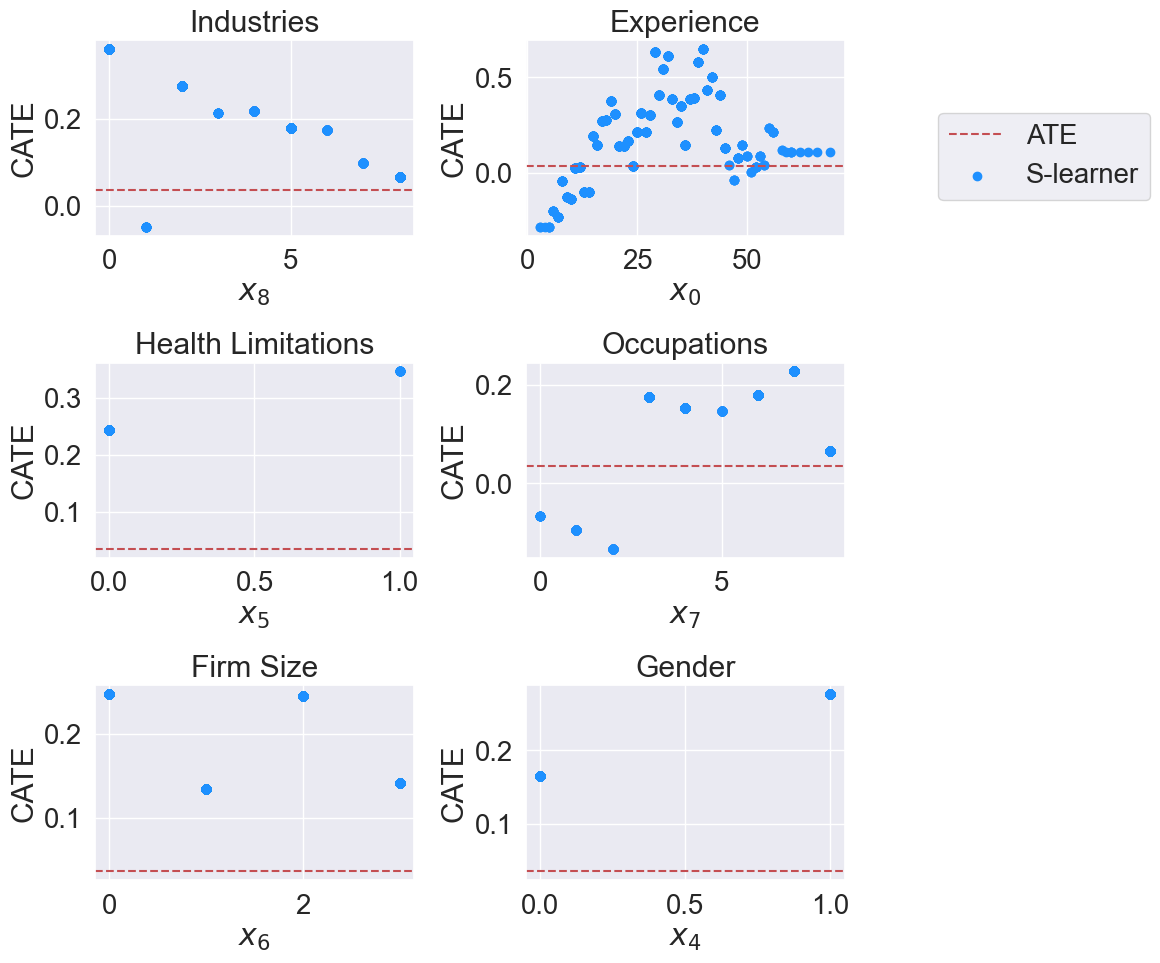

In [141]:
from matplotlib import cm
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
from matplotlib.ticker import NullFormatter  


plt.figure(figsize=(10, 10))

#1
plt.subplot2grid((3,2), (0,0))
plt.axhline(baseline[0], color = 'r', linestyle = '--', label = 'ATE')
plt.scatter(X8_test[:,0],S_te_8, label='S-learner',color='#1E90FF') ##CHECK THIS
plt.xlabel('$x_8$')
plt.ylabel('CATE')
##plt.legend()
plt.title('Industries')

#2
plt.subplot2grid((3,2), (0,1))
plt.axhline(baseline[0], color = 'r', linestyle = '--', label = 'ATE')
plt.scatter(X0_test[:,0],S_te_0, label='S-learner',color='#1E90FF') ##CHECK THIS
plt.xlabel('$x_0$')
plt.ylabel('CATE')
##plt.legend()
plt.title('Experience')

#3
plt.subplot2grid((3,2), (1,0))
plt.axhline(baseline[0], color = 'r', linestyle = '--', label = 'ATE')
plt.scatter(X5_test[:,0],S_te_5, label='S-learner',color='#1E90FF') ##CHECK THIS
plt.xlabel('$x_5$')
plt.ylabel('CATE')
##plt.legend()
plt.title('Health Limitations')


#4
plt.subplot2grid((3,2), (1,1))
plt.axhline(baseline[0], color = 'r', linestyle = '--', label = 'ATE')
plt.scatter(X7_test[:,0],S_te_7, label='S-learner',color='#1E90FF') ##CHECK THIS
plt.xlabel('$x_7$')
plt.ylabel('CATE')
##plt.legend()
plt.title('Occupations')

#5
plt.subplot2grid((3,2), (2,0))
plt.axhline(baseline[0], color = 'r', linestyle = '--', label = 'ATE')
plt.scatter(X6_test[:,0],S_te_6, label='S-learner',color='#1E90FF') ##CHECK THIS
plt.xlabel('$x_6$')
plt.ylabel('CATE')
##plt.legend()
plt.title('Firm Size')

#6
plt.subplot2grid((3,2), (2,1))
plt.axhline(baseline[0], color = 'r', linestyle = '--', label = 'ATE')
plt.scatter(X4_test[:,0],S_te_4, label='S-learner',color='#1E90FF') ##CHECK THIS
plt.xlabel('$x_4$')
plt.ylabel('CATE')
plt.legend()
plt.title('Gender')


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.20, right=0.95, hspace=0.65,
                    wspace=0.35)
plt.legend(bbox_to_anchor=(2,4), loc="upper right")
plt.savefig('het_cates_v2.pdf')
plt.show()